In [1]:
import h5py
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('~/Python_Tool/ryan_mplstyle.mplstyle')

from scipy.stats import skew

In [2]:
Ro = 0.1
Bu = 8

Ly_instab = 8
Ly = Ly_instab*4
Ny = 256
Lx = Ly*2
Nx = Ny*2

In [3]:
# SW
diagname = '2LaySW_dg_%.2f_%.3f_%d' %(Ly_instab,Ro,Nx)
diagname = diagname.replace(".", "d" ); 

diagname = ''+diagname+'/'+diagname+'_s1.h5'
# xi = np.inf

with h5py.File(diagname, mode='r') as file:
    
    dg_time_ary = np.array(file['scales']['sim_time'])
    print(dg_time_ary[-1])

    SW_KE1 = np.array(file['tasks']['KE1'])
    SW_KE2 = np.array(file['tasks']['KE2'])

    SW_zeta1_skew = np.array(file['tasks']['zeta1_skew'])
    SW_zeta2_skew = np.array(file['tasks']['zeta2_skew'])

diagname = '2LayP1_dg_%.2f_%.3f_%d' %(Ly_instab,Ro,Nx)
diagname = diagname.replace(".", "d" ); 

diagname = ''+diagname+'/'+diagname+'_s1.h5'
# xi = np.inf

with h5py.File(diagname, mode='r') as file:
    
    dg_time_ary = np.array(file['scales']['sim_time'])
    print(dg_time_ary[-1])

    P1_KE1 = np.array(file['tasks']['KE1'])
    P1_KE2 = np.array(file['tasks']['KE2'])

    P1_zeta1_skew = np.array(file['tasks']['zeta1_skew'])
    P1_zeta2_skew = np.array(file['tasks']['zeta2_skew'])

299.9998156094237
299.9961864937621


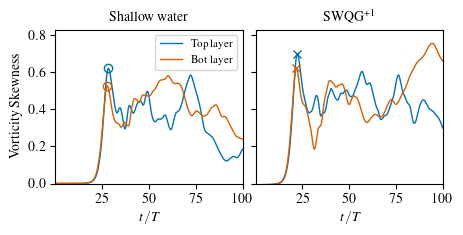

In [27]:
fig = plt.figure(figsize=(5, 2))

gs = fig.add_gridspec(1,2, wspace=0.07)
grid = gs.subplots(sharex=True, sharey=True)

min_x = 1000

im0 = grid[0].plot(dg_time_ary[1:min_x],SW_zeta1_skew[1:min_x,0,0],label="Top layer")
im0 = grid[0].plot(dg_time_ary[1:min_x],SW_zeta2_skew[1:min_x,0,0],label="Bot layer")
grid[0].plot(dg_time_ary[np.argmax(SW_zeta1_skew[0:300])],np.max(SW_zeta1_skew[0:300]),'o',color=[0,0.4453125,0.6953125], mfc='none')
grid[0].plot(dg_time_ary[np.argmax(SW_zeta2_skew[0:300])],np.max(SW_zeta2_skew[0:300]),'o',color=[0.83203125,0.3671875,0.], mfc='none')
grid[0].set_xlabel("$t/T$"); 
grid[0].set_ylabel("Vorticity Skewness")
grid[0].set_title("Shallow water")
grid[0].set_ylim(0,0.83); 
grid[0].set_xlim(1e-6,100)
grid[0].legend()

im1 = grid[1].plot(dg_time_ary[1:min_x],P1_zeta1_skew[1:min_x,0,0])
im1 = grid[1].plot(dg_time_ary[1:min_x],P1_zeta2_skew[1:min_x,0,0])
grid[1].plot(dg_time_ary[np.argmax(P1_zeta1_skew[0:300])],np.max(P1_zeta1_skew[0:300]),'x',color=[0,0.4453125,0.6953125], mfc='none')
grid[1].plot(dg_time_ary[np.argmax(P1_zeta2_skew[0:300])],np.max(P1_zeta2_skew[0:300]),'x',color=[0.83203125,0.3671875,0.], mfc='none')
grid[1].set_xlabel("$t/T$"); 
grid[1].set_title("SWQG$\\textsuperscript{+1}$")

figname = 'figs/two_lay_vortskew.pdf'
# plt.savefig(figname, bbox_inches='tight')
plt.show()

In [18]:
snapname = '2LaySW_sp_%.2f_%.3f_%d' %(Ly_instab,Ro,Nx)
snapname = snapname.replace(".", "d" ); 
sp_int = 1
snapname = ''+snapname+'/'+snapname+'_s%d.h5' %sp_int

with h5py.File(snapname, mode='r') as file:
    
    SW_h1_data = np.squeeze(np.array(file['tasks']['h1']))*Ro/Bu
    SW_h2_data = np.squeeze(np.array(file['tasks']['h2']))*Ro/Bu
    
    SW_zeta_1_data = np.squeeze(np.array(file['tasks']['zeta_1']))*Ro
    SW_zeta_2_data = np.squeeze(np.array(file['tasks']['zeta_2']))*Ro
    
    SW_div_1_data = np.squeeze(np.array(file['tasks']['div_1']))*Ro
    SW_div_2_data = np.squeeze(np.array(file['tasks']['div_2']))*Ro
    
    SW_sim_time_ary = np.array(file['scales']['sim_time'])
    # print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-2]])
    y = np.array(file['scales'][list(file['scales'])[-1]])

snapname = '2LayP1_sp_%.2f_%.3f_%d' %(Ly_instab,Ro,Nx)
snapname = snapname.replace(".", "d" ); 
sp_int = 3
snapname = ''+snapname+'/'+snapname+'_s%d.h5' %sp_int

with h5py.File(snapname, mode='r') as file:
    
    P1_h1_data = np.squeeze(np.array(file['tasks']['h1']))*Ro/Bu
    P1_h2_data = np.squeeze(np.array(file['tasks']['h2']))*Ro/Bu
    
    P1_zeta_1_data = np.squeeze(np.array(file['tasks']['zeta_1']))*Ro
    P1_zeta_2_data = np.squeeze(np.array(file['tasks']['zeta_2']))*Ro
    
    P1_div_1_data = np.squeeze(np.array(file['tasks']['div_1']))*Ro
    P1_div_2_data = np.squeeze(np.array(file['tasks']['div_2']))*Ro
    
    P1_sim_time_ary = np.array(file['scales']['sim_time'])
    # print(sim_time_ary)
    
    x = np.array(file['scales'][list(file['scales'])[-2]])
    y = np.array(file['scales'][list(file['scales'])[-1]])

29.998266785042436
24.001585131326824


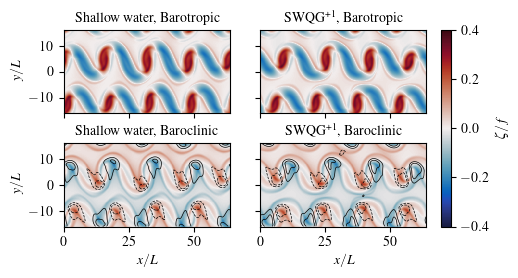

In [20]:
SW_time_idx = 30
P1_time_idx = 4

print(SW_sim_time_ary[SW_time_idx])
print(P1_sim_time_ary[P1_time_idx])

fig = plt.figure(figsize=(5, 7))

grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(2,2),
                 axes_pad=0.3,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="3%",
                 cbar_pad=0.15,
                 )

clim = 0.4
div_ary = [-0.01,-0.005,0.005,0.01]

im0 = grid[0].pcolormesh(x,y,(SW_zeta_1_data[SW_time_idx,:,:].T+SW_zeta_2_data[SW_time_idx,:,:].T)/2, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[0].contour(x,y,(SW_div_1_data[SW_time_idx,:,:].T+SW_div_2_data[SW_time_idx,:,:].T)/2, div_ary, colors='black', linewidths=0.5)
grid[0].set_aspect('equal')
grid[0].set_xlabel("$x/L$"); grid[0].set_ylabel("$y/L$")
# grid[0].set_title("Shallow water, Upper, $t/T=%.0f$" %SW_sim_time_ary[SW_time_idx])
grid[0].set_title("Shallow water, Barotropic")

im2 = grid[2].pcolormesh(x,y,(SW_zeta_1_data[SW_time_idx,:,:].T-SW_zeta_2_data[SW_time_idx,:,:].T)/2, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[2].contour(x,y,(SW_div_1_data[SW_time_idx,:,:].T-SW_div_2_data[SW_time_idx,:,:].T)/2, div_ary, colors='black', linewidths=0.5)
grid[2].set_aspect('equal')
grid[2].set_xlabel("$x/L$"); grid[2].set_ylabel("$y/L$")
grid[2].set_title("Shallow water, Baroclinic")

im1 = grid[1].pcolormesh(x,y,(P1_zeta_1_data[P1_time_idx,:,:].T+P1_zeta_2_data[P1_time_idx,:,:].T)/2, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[1].contour(x,y,(P1_div_1_data[P1_time_idx,:,:].T+P1_div_2_data[P1_time_idx,:,:].T)/2, div_ary, colors='black', linewidths=0.5)
grid[1].set_aspect('equal')
grid[1].set_xlabel("$x/L$"); grid[1].set_ylabel("$y/L$")
# grid[1].set_title("SWQG$\\textsuperscript{+1}$, Upper, $t/T=%.0f$" %P1_sim_time_ary[P1_time_idx])
grid[1].set_title("SWQG$\\textsuperscript{+1}$, Barotropic")

im3 = grid[3].pcolormesh(x,y,(P1_zeta_1_data[P1_time_idx,:,:].T-P1_zeta_2_data[P1_time_idx,:,:].T)/2, cmap=cmo.balance, vmin=-clim, vmax=clim)
grid[3].contour(x,y,(P1_div_1_data[P1_time_idx,:,:].T-P1_div_2_data[P1_time_idx,:,:].T)/2, div_ary, colors='black', linewidths=0.5)
grid[3].set_aspect('equal')
grid[3].set_xlabel("$x/L$"); grid[3].set_ylabel("$y/L$")
grid[3].set_title("SWQG$\\textsuperscript{+1}$, Baroclinic")

# Colorbar
cbar = grid[1].cax.colorbar(im1)
cbar.set_label("$\zeta/f$")

figname = 'figs/twolay_zeta_snap_t%.1f' %(SW_sim_time_ary[SW_time_idx])
figname = figname.replace(".", "d" ); figname = figname+'.png'
# plt.savefig(figname, bbox_inches='tight', dpi=800)